In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import xlwt
import xlsxwriter

Read items from excel

In [24]:
#excel_sheets = pd.ExcelFile('EM_Risk_Monitor.xlsx')

sheet_names = pd.read_excel('EM_Risk_Monitor.xlsx', sheet_name=None)

sheets = list(sheet_names.keys())

for i in range(len(sheets)):
    sheets[i] = pd.read_excel('EM_Risk_Monitor.xlsx', sheet_name=sheets[i])
    
    
#countries and stuff
countries =['Argentina','Brazil','Bulgaria','Chile', 'Colombia','Croatia', 'Hungary', 'India', 'Indonesia', 'Malaysia',
            'Mexico', 'Panama', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'South Africa', 'Thailand', 'Turkey', 'Ukraine', 'Venezuela']

combine a dictionary and a list

In [25]:
names = {k: None for k in list(sheet_names.keys())}

In [26]:
final_DF = dict(zip(names, sheets))

We now assume that there aren't missing columns and stuff - if data is missing, we impute.

In [14]:
#FIll in missing values by imputing the data

In [27]:
for items in names:
    final_DF[items].fillna(final_DF[items].mean(), inplace=True)

mAKE THE Timeline column a datetime

In [28]:
for sheet_nam in names:
    final_DF[sheet_nam].quarter = pd.to_datetime(final_DF[sheet_nam].quarter)
    final_DF[sheet_nam].set_index('quarter', inplace=True)

We are now going to standardize and normalize the data

y = (x- mean)/standard_deviation

A standardization is a measure of how may standard deviations the value is from its mean

In [30]:
from sklearn import preprocessing
from math import sqrt

In [29]:
norm_ = []
stan_dard = []


for m in names:
    norm_.append(m+"NORM")
    stan_dard.append(m+"STAND")
    

normalized = {k: None for k in norm_}
standard = {k: None for k in stan_dard}

In [31]:
#aDD NEW Normalized things and stuff.

for leina, norma, standa in zip(names, norm_, stan_dard):
    normalized[norma] = (final_DF[leina] - final_DF[leina].mean())/(final_DF[leina].max() - final_DF[leina].min())
    standard[standa] = (final_DF[leina] - final_DF[leina].mean())/final_DF[leina].std()

Scatter plot for standardized data

In [ ]:
"""for item in stan_dard:
    plt.scatter(standard[item], standard['fiveYearCDSSTAND'], color='green')
    plt.title(item + " vs fiveYearCDSSTAND")
    plt.grid(True)
    plt.show"""

Scatter plot for normalized data

In [53]:
"""for item in norm_:
    plt.scatter(normalized[item], normalized['fiveYearCDSNORM'], color='red')
    plt.title(item + " vs fiveYearCDSNORM")
    plt.grid(True)
    plt.show"""

'for item in norm_:\n    plt.scatter(normalized[item], normalized[\'fiveYearCDSNORM\'], color=\'red\')\n    plt.title(item + " vs fiveYearCDSNORM")\n    plt.grid(True)\n    plt.show'

The charts above are of both normalized and standadized data and for most of them there appears to be no discernible relationship with the CDS.

This is a time series data with a lot of variation that is based on time, thus we are going to attempt a time series analysis.

#The following code is a plot for time series

from pylab import rcParams
import statsmodels.api as sm
import matplotlib
rcParams['figure.figsize'] = 18, 8

"""Using the following method, one is able to visualize data using a time series decomposition method, that allows us to see trend, seasonality and noise"""
decomposition = sm.tsa.seasonal_decompose(normalized['3_Month_Deposit_RateNORM'], model='additive')
fig = decomposition.plot()
plt.show()



In [15]:
import statsmodels.api as sm
from sklearn import linear_model
from pandas import Series
from pandas.plotting import lag_plot

In [52]:
#regression analysis (overall CDS)


"""lag_plot(final_DF['fiveYearCDS'])
plt.show()


for i in norm_:
    lag_plot(normalized[i])
    #lag_plot(standard[j])
    plt.show"""

"lag_plot(final_DF['fiveYearCDS'])\nplt.show()\n\n\nfor i in norm_:\n    lag_plot(normalized[i])\n    #lag_plot(standard[j])\n    plt.show"

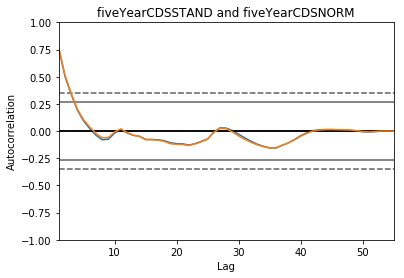

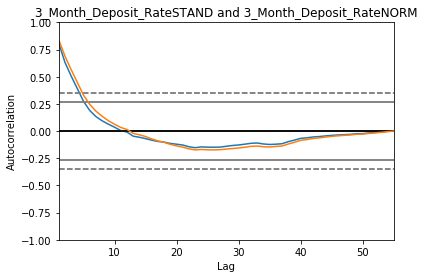

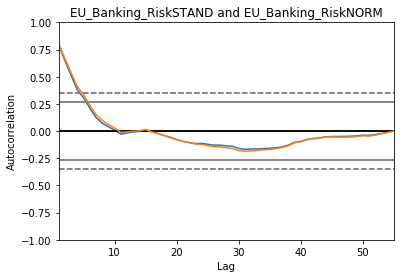

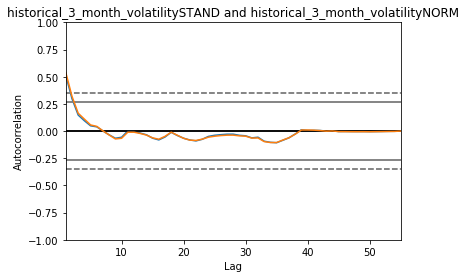

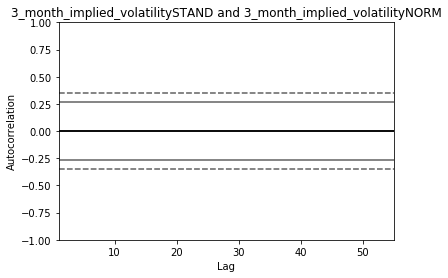

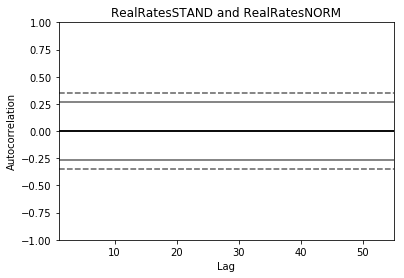

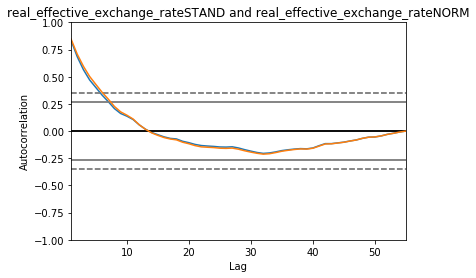

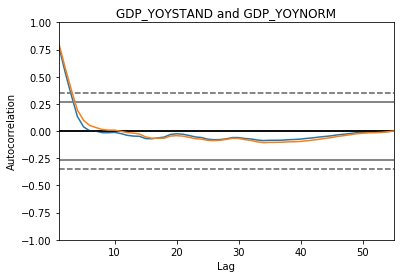

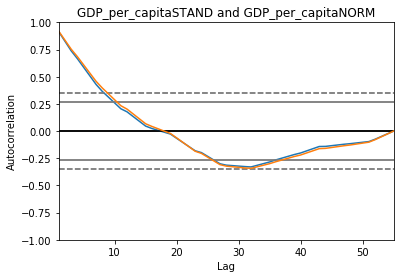

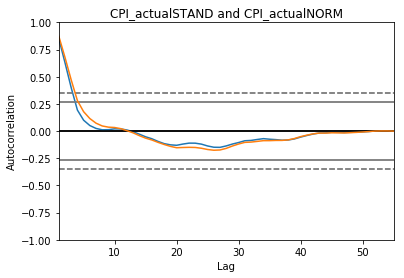

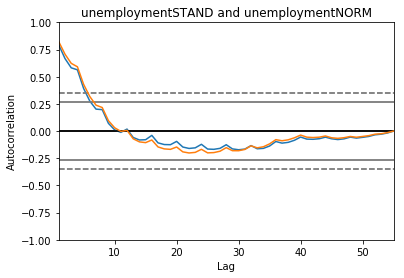

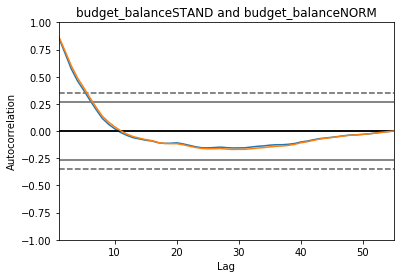

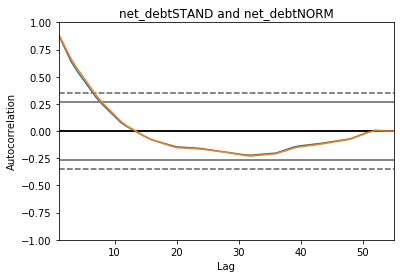

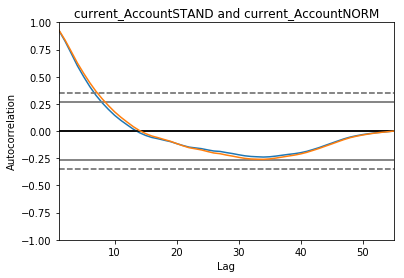

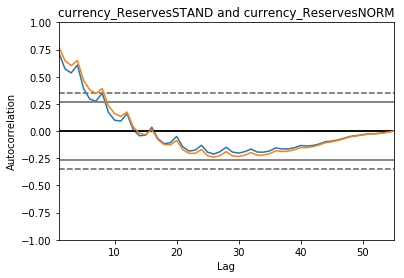

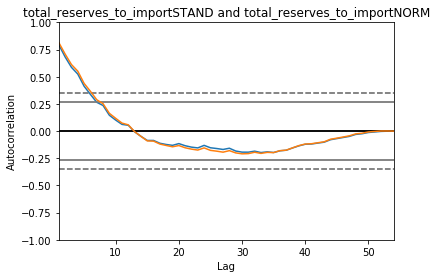

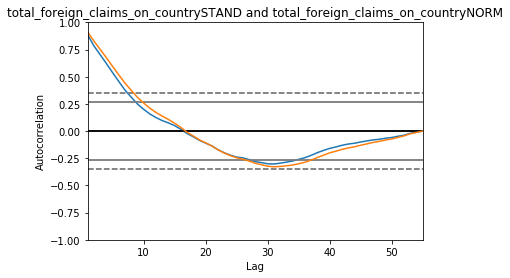

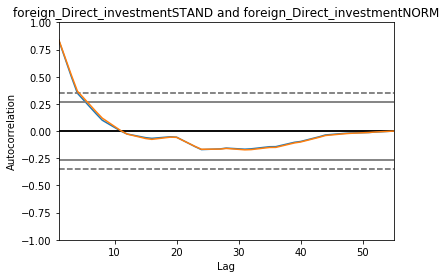

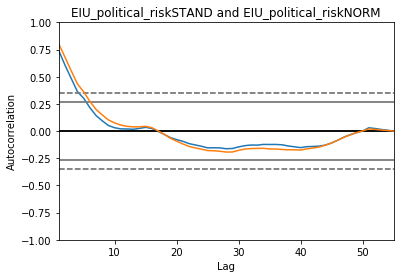

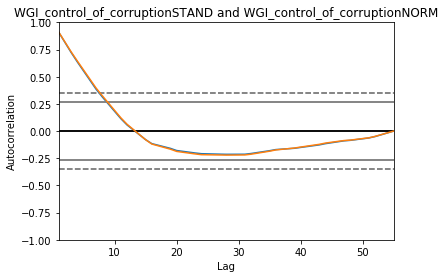

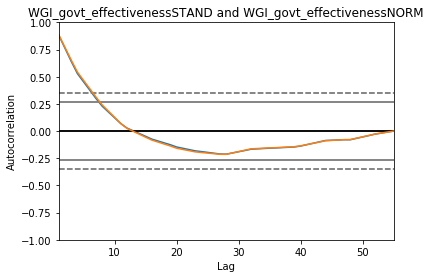

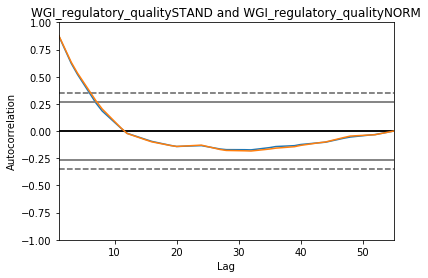

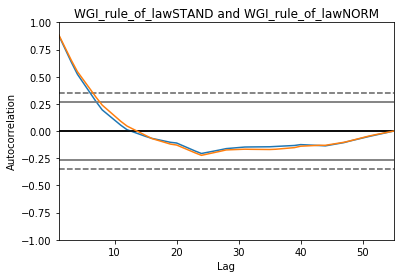

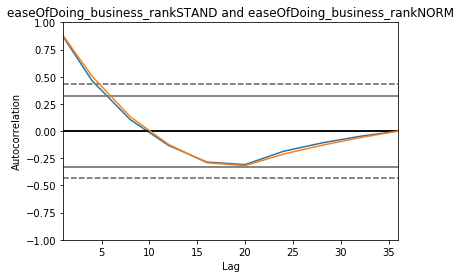

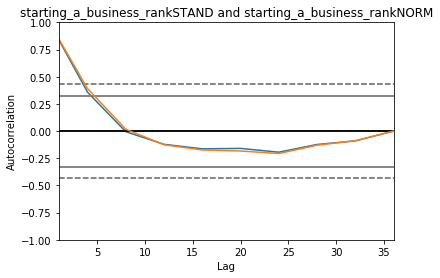

In [45]:
#autocorellation plots
from pandas.plotting import autocorrelation_plot

for i, j in zip(stan_dard, norm_):
    autocorrelation_plot(standard[i])
    autocorrelation_plot(normalized[j])
    plt.title(i+" and "+j)
    plt.show()